## Import libraries

In [1]:
# Standart import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Import models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Import data 

In [2]:
# Import data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [4]:
df_test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


## Data analysis

In [5]:
# Information about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
df_train = df_train.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)

In [8]:
df_train.shape

(50, 6)

In [9]:
# Describe the data
df_train.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,50.000000,47.000000,50.000000
mean,76793.349583,121344.639600,224494.784894,112012.639200
std,44224.086236,28017.802755,113316.503936,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45528.002500,103730.875000,139268.715000,90138.902500
50%,74661.715000,122699.795000,229160.950000,107978.190000
75%,105065.712500,144842.180000,301528.275000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df_test.describe()

,R&D Spend,Administration,Marketing Spend
count,48.000000,48.000000,50.000000
mean,76793.349583,123028.223542,224799.600000
std,44224.086236,26619.711479,113036.775549
min,542.050000,51743.150000,1903.930000
25%,45528.002500,105077.645000,138615.667500
50%,74661.715000,123467.895000,239000.195000
75%,105065.712500,145190.700000,302423.767500
max,165349.200000,182645.560000,471784.100000


In [11]:
# Information about the types of data
df_train.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Category            object
Profit             float64
dtype: object

In [12]:
df_test.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Category            object
dtype: object

In [13]:
# Check missing values
df_train.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

In [14]:
df_test.isna().sum()

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

In [15]:
# Drop missing categorical values, there is only one missing value in each data
df_train.dropna(subset=["Category"], inplace=True)
df_test.dropna(subset=["State"], inplace=True)

In [16]:
df_train.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           0
Profit             0
dtype: int64

In [17]:
df_test.isna().sum()

R&D Spend          2
Administration     2
Marketing Spend    0
State              0
Category           0
dtype: int64

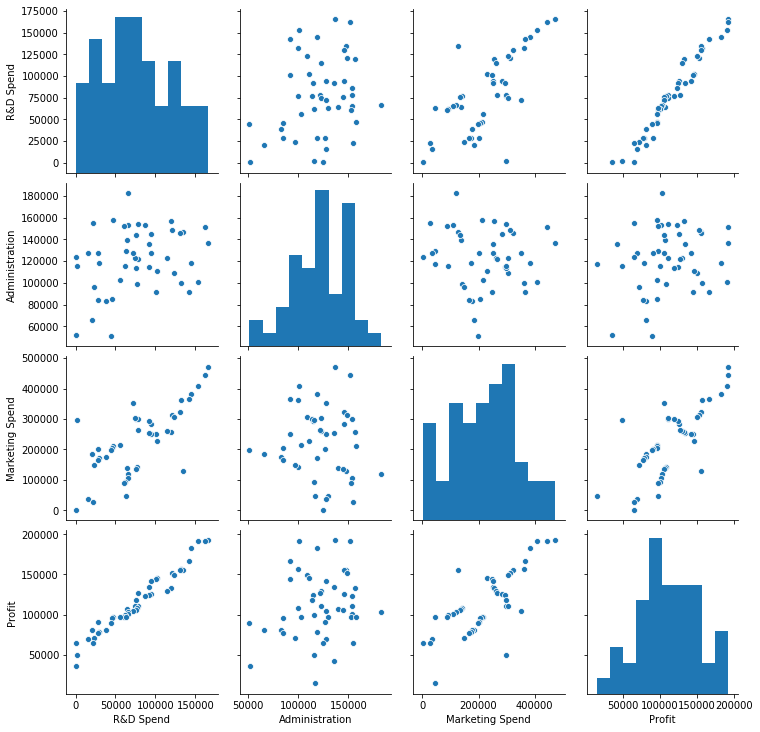

In [18]:
# Visualisation of the data
sns.pairplot(df_train);

## Training a model

In [19]:
# Build Pipeline

# Define different categorical features
categortical_features = ["State", "Category"]

# Create categorical tranformer Pipeline
categorical_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

# Define different numerical features
numeric_features = ["R&D Spend", "Administration", "Marketing Spend"]

# Create numerical transfomer Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean"))
])

In [20]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_tranformer, categortical_features),
        ('num', numeric_transformer, numeric_features)
    ])

In [21]:
# Create dictionary of the models
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel='linear'),
                     "SVR_rbf": SVR(kernel='rbf'),
                     "RandomForestRegressor": RandomForestRegressor(),
                     "GradientBoostingRegressor": GradientBoostingRegressor()}

results_train = {}
results = {}
results_all = {}

In [22]:
# Split the data into X & y
X = df_train.drop("Profit", axis=1)
y = df_train["Profit"]

In [23]:
X.shape

(49, 5)

In [24]:
pd.get_dummies(X).shape

(49, 12)

In [25]:
df_test.head()

,R&D Spend,Administration,Marketing Spend,State,Category
0,165349.20,136897.80,471784.10,New York,Industrials
1,162597.70,151377.59,443898.53,California,Technology
2,153441.51,101145.55,407934.54,Florida,Healthcare
3,144372.41,118671.85,383199.62,New York,Financials
4,142107.34,91391.77,366168.42,Florida,Industrials


In [26]:
pd.get_dummies(df_test).shape

(49, 12)

In [27]:
# Split train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
for model_name, model in regression_models.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f"Fitting the model {model_name}....")
    model_pipeline.fit(X_train, y_train)
    
    results_train[model_name] = model_pipeline.score(X_train, y_train)
    results[model_name] = model_pipeline.score(X_test, y_test)
    results_all[model_name] = model_pipeline.score(df_test, y)

Fitting the model Ridge....
Fitting the model SVR_linear....
Fitting the model SVR_rbf....
Fitting the model RandomForestRegressor....
Fitting the model GradientBoostingRegressor....


In [29]:
results_train

{'Ridge': 0.8854378603204829,
 'SVR_linear': 0.8442114165045765,
 'SVR_rbf': 0.0001191962154312165,
 'RandomForestRegressor': 0.9740693029507459,
 'GradientBoostingRegressor': 0.9999138993550414}

In [30]:
results

{'Ridge': 0.37881472165876773,
 'SVR_linear': 0.32584289131701005,
 'SVR_rbf': -0.07143293449661181,
 'RandomForestRegressor': 0.7355152724049167,
 'GradientBoostingRegressor': 0.8925643751538859}

In [31]:
results_all

{'Ridge': 0.7635470082643564,
 'SVR_linear': 0.7038852587192045,
 'SVR_rbf': -0.004713797740066861,
 'RandomForestRegressor': 0.9018410730540818,
 'GradientBoostingRegressor': 0.9702484950952975}

**The best model - `GradientBoostingRegressor`**

## Tuning a model

In [32]:
# Create RandomForestRegressor Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8872258847321399

In [33]:
# Use GridSearch for tuning hyperparameters with our Pipeline
pipe_grid = {"preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators" : [20, 40, 100, 200],
    "model__learning_rate": [0.01, 0.1, 0.5, 1],
    "model__max_depth": [2, 3, 4],
    "model__min_samples_split": [2, 4]}

In [34]:
gs_model = GridSearchCV(model, pipe_grid, cv=5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [35]:
gs_model.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 2,
 'model__min_samples_split': 2,
 'model__n_estimators': 20,
 'preprocessor__num__imputer__strategy': 'mean'}

In [36]:
gs_model.score(X_test, y_test)

0.646858037444108

In [37]:
y_preds = model.predict(df_test)
res = pd.DataFrame()
res["Profit"] = pd.Series(y_preds)
res

,Profit
0,192131.593173
1,191608.584774
2,190939.221071
3,182944.687631
4,174934.476425
5,156891.203615
6,156202.125552
7,156574.652842
8,152125.843825
9,149863.490253


In [38]:
res.to_csv('StartupPredictions.csv', index=False)

**Conclusion: there is not enough a data (only 50 samples). Model without tuning is better.**

**The best model is `GradientBoostingRegressor` with standart paramaters at the moment, but the model is overfitting, needs more data.**